# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

df_0 = pd.read_csv(r'C:\Users\user\Desktop\Для проектов\geo_data_0.csv')
df_0 = df_0.drop(['id'], axis = 1)
df_0.info()
display(df_0.head())

df_1 = pd.read_csv(r'C:\Users\user\Desktop\Для проектов\geo_data_1.csv')
df_1 = df_1.drop(['id'], axis = 1)
df_1.info()
display(df_1.head())

df_2 = pd.read_csv(r'C:\Users\user\Desktop\Для проектов\geo_data_2.csv')
df_2 = df_2.drop(['id'], axis = 1)
df_2.info()
display(df_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


Изучение данных показало следующее, во-первых пропусков нет, во-вторых все данные количественные, кроме стобца id, который я удалил, потому что он не несет важной информации ,а будет только засорять модель. Предстоит решить задачу регрессии, целевой столбец product. 

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


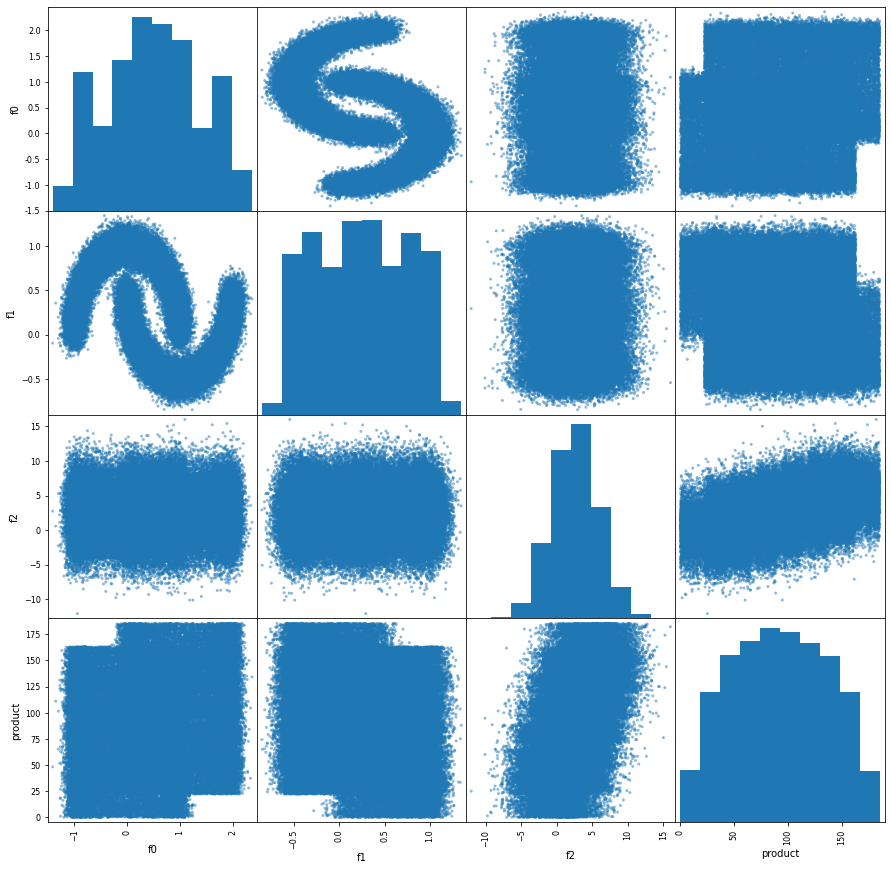

In [2]:
pd.plotting.scatter_matrix(df_0, figsize=(15, 15))
print(df_0.corr())
df_0.describe()

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


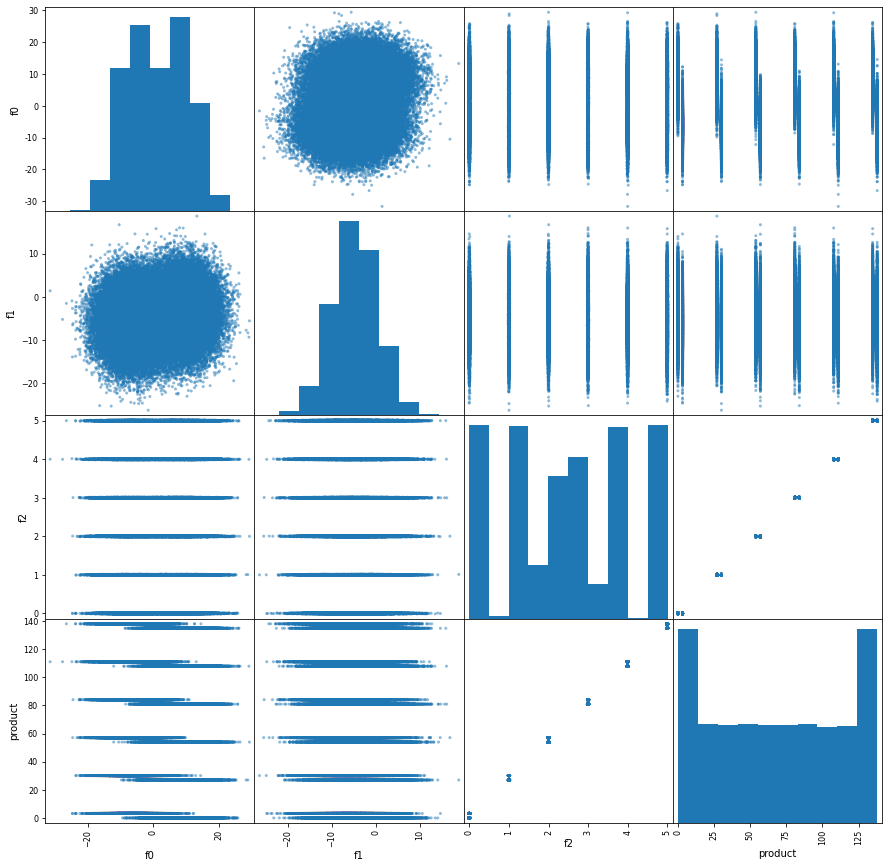

In [3]:
pd.plotting.scatter_matrix(df_1, figsize=(15, 15))
print(df_1.corr())
df_1.describe()

               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


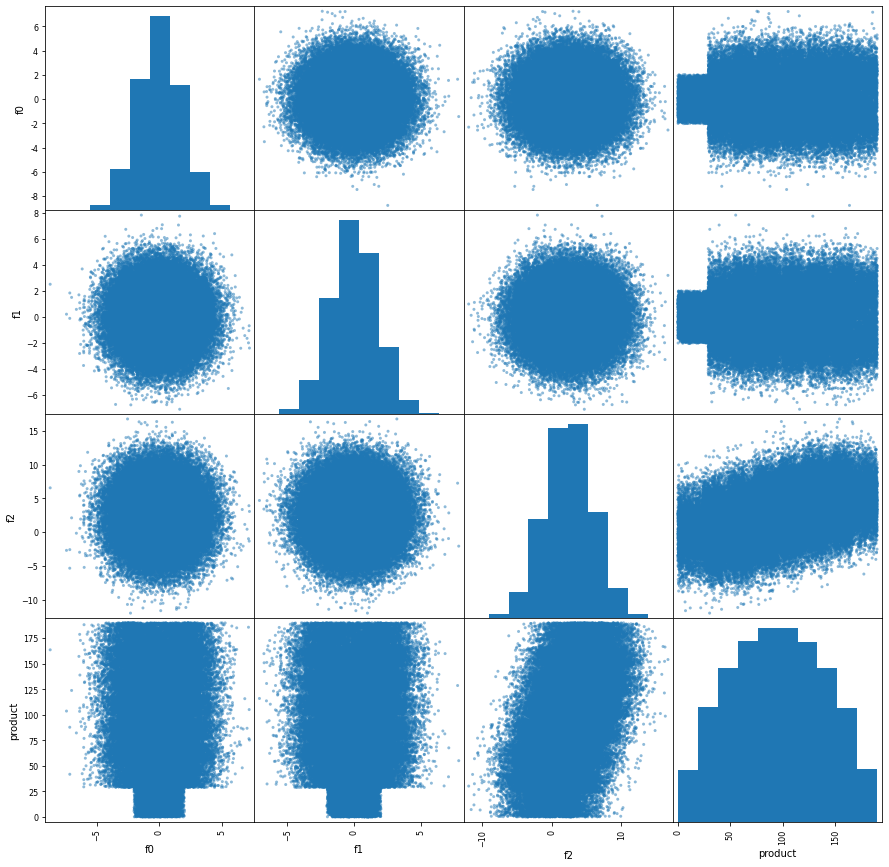

In [4]:
pd.plotting.scatter_matrix(df_2, figsize=(15, 15))
print(df_2.corr())
df_2.describe()

Более детально изучили данные. Сильно коррелирующих столбцов не обнаружено (это хорошо для модели). На визуализации видно, что регионы сильно отличаются друг от друга, и что данные синтетические. Есть гистограммы нормального распределения, есть не очень. Все значения столбиков f имеют отрицательные значения, смысла наверное в этом нет, но  модель соориентируется. Есть скважины с нулевым объемом запасов. Наверное у датасета F1 можно сказать, что у столбцов f2 и product есть выбросы по краям, но думаю так задуманно на синтетических данных, поэтому не трогаю. По поводу масштабирования решил оставить как есть, хотя в первом регионе если судить по мин и мах f2 отлчается от f0 и f1 на порядок, во втором менее явно но примерно то же, а втретьем различий нет. 

## Обучение и проверка модели

In [5]:
features_0 = df_0.drop(['product'], axis=1)
target_0 = df_0['product']
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(# разделение на обучающую и валидационную выборки
    features_0, target_0, test_size=0.25, random_state=10000)
model_0 = LinearRegression()# инициализация модели LinearRegression
model_0.fit(features_train_0, target_train_0) # обучение модель на тренировочной выборке
predictions_valid_0 = pd.Series(model_0.predict(features_valid_0), index=target_valid_0.index) #  предсказание модели на валидационной выборке
print("RMSE модели f0 линейной регрессии на валидационной выборке:", mean_squared_error(target_valid_0, predictions_valid_0)**0.5)
print("Средний запас предсказанного сырья f0:", predictions_valid_0.mean())
print("Средний запас известного сырья f0:", target_valid_0.mean())


features_1 = df_1.drop(['product'], axis=1)
target_1 = df_1['product']
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(# разделение на обучающую и валидационную выборки
    features_1, target_1, test_size=0.25, random_state=10000)
model_1 = LinearRegression()# инициализация модели LinearRegression
model_1.fit(features_train_1, target_train_1) # обучение модель на тренировочной выборке
predictions_valid_1 = pd.Series(model_1.predict(features_valid_1), index=target_valid_1.index) #  предсказание модели на валидационной выборке
print("RMSE модели f1 линейной регрессии на валидационной выборке:", mean_squared_error(target_valid_1, predictions_valid_1)**0.5)
print("Средний запас предсказанного сырья f1:", predictions_valid_1.mean())
print("Средний запас известного сырья f1:", target_valid_1.mean())


features_2 = df_2.drop(['product'], axis=1)
target_2 = df_2['product']
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(# разделение на обучающую и валидационную выборки
    features_2, target_2, test_size=0.25, random_state=10000)
model_2 = LinearRegression()# инициализация модели LinearRegression
model_2.fit(features_train_2, target_train_2) # обучение модель на тренировочной выборке
predictions_valid_2 = pd.Series(model_2.predict(features_valid_2), index=target_valid_2.index) #  предсказание модели на валидационной выборке
print("RMSE модели f2 линейной регрессии на валидационной выборке:", mean_squared_error(target_valid_2, predictions_valid_2)**0.5)
print("Средний запас предсказанного сырья f2:", predictions_valid_2.mean())
print("Средний запас известного сырья f2:", target_valid_2.mean())

RMSE модели f0 линейной регрессии на валидационной выборке: 37.71000259560677
Средний запас предсказанного сырья f0: 92.41387752778155
Средний запас известного сырья f0: 92.2195637469635
RMSE модели f1 линейной регрессии на валидационной выборке: 0.8939620215349723
Средний запас предсказанного сырья f1: 68.42645858331633
Средний запас известного сырья f1: 68.43691174327938
RMSE модели f2 линейной регрессии на валидационной выборке: 40.17098452637588
Средний запас предсказанного сырья f2: 95.12581551796492
Средний запас известного сырья f2: 94.8589465929191


Следуя условиям задачи, разбил на обучающую и валидационную выборки (тестовая не нужна). Для трех регионов обучил три модели, актуальные для каждого региона. Получил предсказания, и оценку качества предсказания. У регионов f0 и f2 схожие и средние значения запаса скважин и RMSE, то есть ошибка(отклонение). У региона f1 средний запас скважин ощутимо ниже, но и RMSE практически нулевая. Ради интереса, я вывел средний запас извеcтного сырья на валидационной выборке. Все три значения близки к предсказанным. Считаю, что лучшая модель f1, потому что RMSE близко к нулю.

## Подготовка к расчёту прибыли

In [6]:
TOTAL_SKV = 500
BEST_TOTAL_SKV = 200
BUDGET = 10000000000
DOXOD_EDIN = 450000

dost_dobicha = BUDGET / DOXOD_EDIN / BEST_TOTAL_SKV
print("Достаточный объем добычи для безубыточности проекта:", dost_dobicha)

Достаточный объем добычи для безубыточности проекта: 111.11111111111111


Можно сказать, что достаточный объем скважин превышает средний объем скважин всех регионов. Это значит, что если мы просто возьмем на угад 200 скважин, то конечно же понесем убыток. Поэтому важно по имеющимся критериям спрогнозировать благодаря хорошей модели запасы скважин и отобрать именно скважины с самыми высокими запасами.

## Расчёт прибыли и рисков 

In [7]:
def profit(target, probabilities, count):
    skvag_sorted = probabilities.sort_values(ascending=False)
    selected = target[skvag_sorted.index][:count]
    return DOXOD_EDIN * selected.sum() - BUDGET

Создана функция подсчета прибыли

In [8]:
state = np.random.RandomState(10000)    
values_0 = []

for i in range(1000):
    target_subsample_0 = target_valid_0.sample(n=TOTAL_SKV, replace=True, random_state=state) 
    skvag_subsample_0 = predictions_valid_0[target_subsample_0.index] 
    values_0.append(profit(target_subsample_0, skvag_subsample_0, BEST_TOTAL_SKV))
    
values_0 = pd.Series(values_0)
print("Вероятность убытков %:",(values_0 < 0).mean()*100)

mean = values_0.mean()
lower = values_0.quantile(0.025)   
Upper = values_0.quantile(0.975) 
print("Средняя прибыль:", mean)
print("2,5 %-квантиль:", lower)
print("97,5 %-квантиль:", Upper)

Вероятность убытков %: 4.8
Средняя прибыль: 449712137.0896987
2,5 %-квантиль: -70874068.85091782
97,5 %-квантиль: 980507592.5298747


In [9]:
state = np.random.RandomState(10000)    
values_1 = []

for i in range(1000):
    target_subsample_1 = target_valid_1.sample(n=TOTAL_SKV, replace=True, random_state=state) 
    skvag_subsample_1 = predictions_valid_1[target_subsample_1.index] 
    values_1.append(profit(target_subsample_1, skvag_subsample_1, BEST_TOTAL_SKV))
    
values_1 = pd.Series(values_1)
print("Вероятность убытков %:",(values_1 < 0).mean()*100)

mean = values_1.mean()
lower = values_1.quantile(0.025)   
Upper = values_1.quantile(0.975) 
print("Средняя прибыль:", mean)
print("2,5 %-квантиль:", lower)
print("97,5 %-квантиль:", Upper)

Вероятность убытков %: 1.2
Средняя прибыль: 486505732.4764016
2,5 %-квантиль: 67478394.11211967
97,5 %-квантиль: 927922895.98025


In [10]:
state = np.random.RandomState(10000)    
values_2 = []

for i in range(1000):
    target_subsample_2 = target_valid_2.sample(n=TOTAL_SKV, replace=True, random_state=state) 
    skvag_subsample_2 = predictions_valid_2[target_subsample_2.index] 
    values_2.append(profit(target_subsample_2, skvag_subsample_2, BEST_TOTAL_SKV))
    
values_2 = pd.Series(values_2)
print("Вероятность убытков %:",(values_2 < 0).mean()*100)

mean = values_2.mean()
lower = values_2.quantile(0.025)   
Upper = values_2.quantile(0.975) 
print("Средняя прибыль:", mean)
print("2,5 %-квантиль:", lower)
print("97,5 %-квантиль:", Upper)

Вероятность убытков %: 13.5
Средняя прибыль: 311480763.36921555
2,5 %-квантиль: -273202079.73735934
97,5 %-квантиль: 842530592.8605982


Получены необходимые метрики для всех регионов добычи. Условию с получением убытков менее 2,5 % соответствует только регион f1, его и будем рекомендовать к использованию. Кроме того у него лучше и другие характеристики, за исключением 97,5 % квантиля. Я бы сказал что больше значений в середине, пиковых как максимальных, так и тем более минимальных меньше, поэтому это более надежно.

## Вывод:
Посмотрели общие метрики исходных данных, подготовку не проводили. Обучили на трех данных одну заранее выбранную модель, Использовали метод Bootstrap, которых показал риски убытков, доверительный интервал и среднюю прибыль. Выбрали регион для разработки f1, в котором риски убытков меньше 2,5 %.